In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
train=pd.read_csv('train_malignant_comments.csv')
train=pd.DataFrame(train)                                # importing the train csv file 

In [3]:
train.shape

(159571, 8)

In [4]:
test=pd.read_csv('test_malignant_comments.csv')
test=pd.DataFrame(test)                                  # importing the test csv file 

In [5]:
test.shape

(153164, 2)

Dimenssion of train data set is 159571 rows and 8 columns.

Dimension of test data set is 153164 rows and 2 columns.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


Train data sset comprise of 2 columns of object and rest 6 of integer data type

Test columns comprise only of object data type, hence to build up and ML model we need to work on object data coulmns so that we could use it efficicently. 

In [8]:
train.isnull().sum(),test.isnull().sum()

(Unnamed: 0          0
 comment_text        0
 malignant           0
 highly_malignant    0
 rude                0
 threat              0
 abuse               0
 loathe              0
 dtype: int64,
 id              0
 comment_text    0
 dtype: int64)

We could understand that there are no null values present in train and test data set.

In [9]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,id,comment_text
count,153164,153164
unique,153164,153039
top,dd3d83c8bfa2d728,#NAME?
freq,1,126


C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


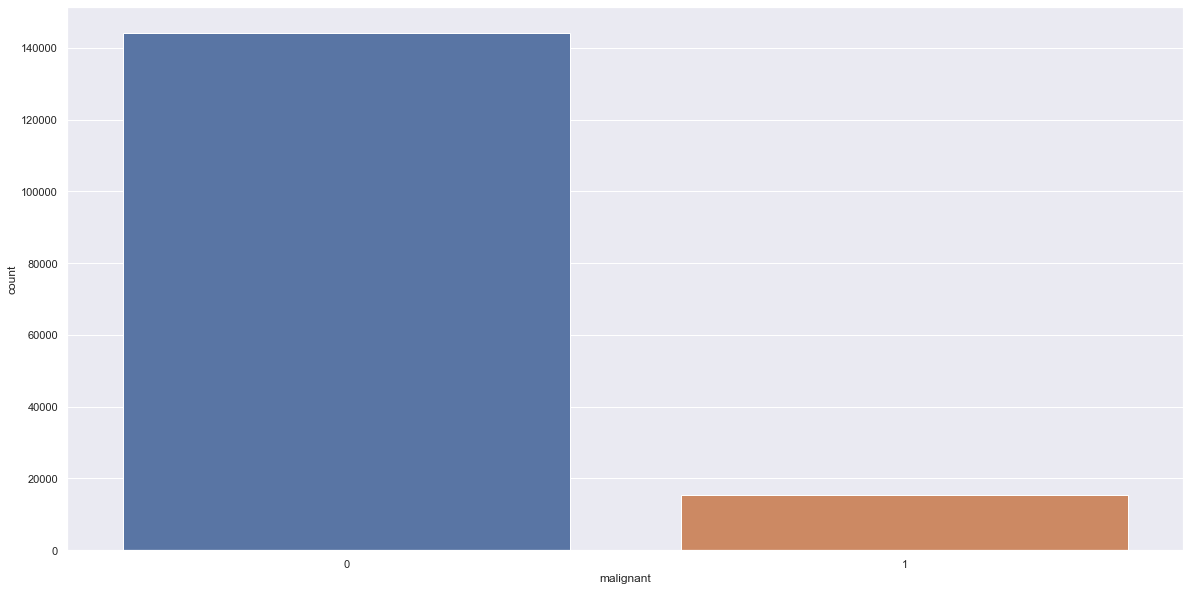

In [11]:
sns.set()
%matplotlib inline
plt.figure(figsize=(20,10))
sns.countplot('malignant',data=train) 

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


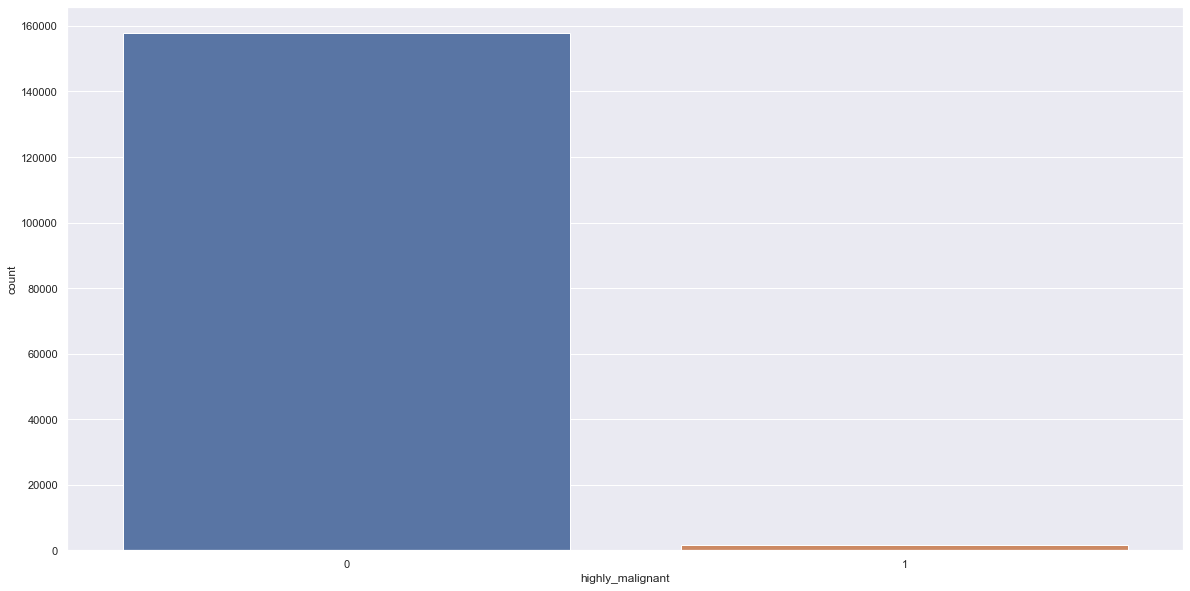

In [12]:

plt.figure(figsize=(20,10))
sns.countplot('highly_malignant',data=train) 

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


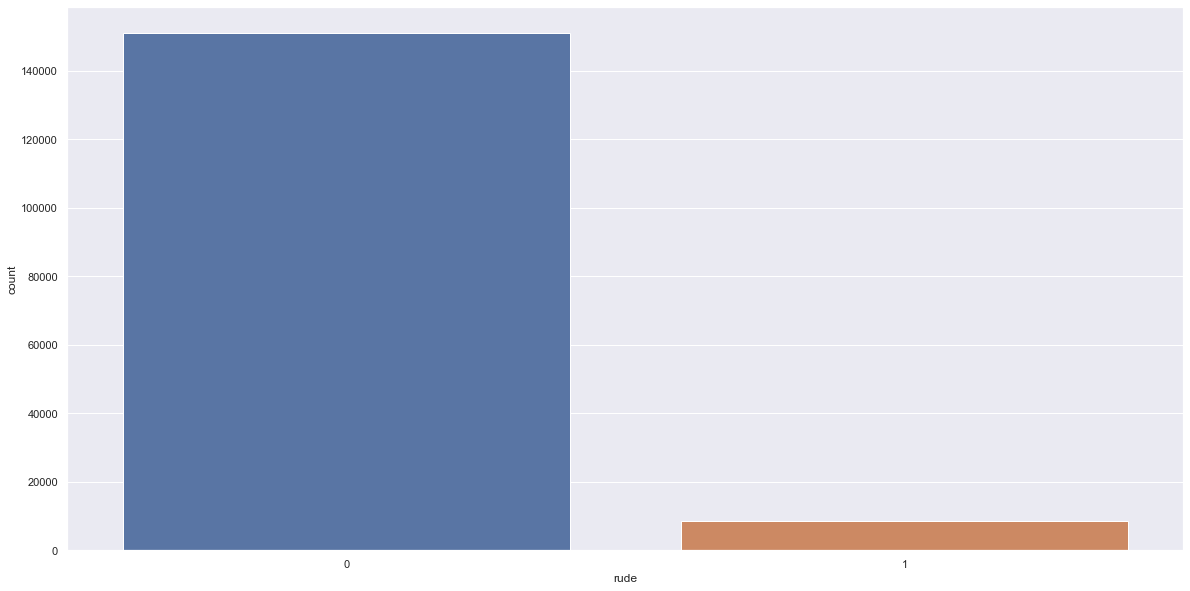

In [13]:
plt.figure(figsize=(20,10))
sns.countplot('rude',data=train) 

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


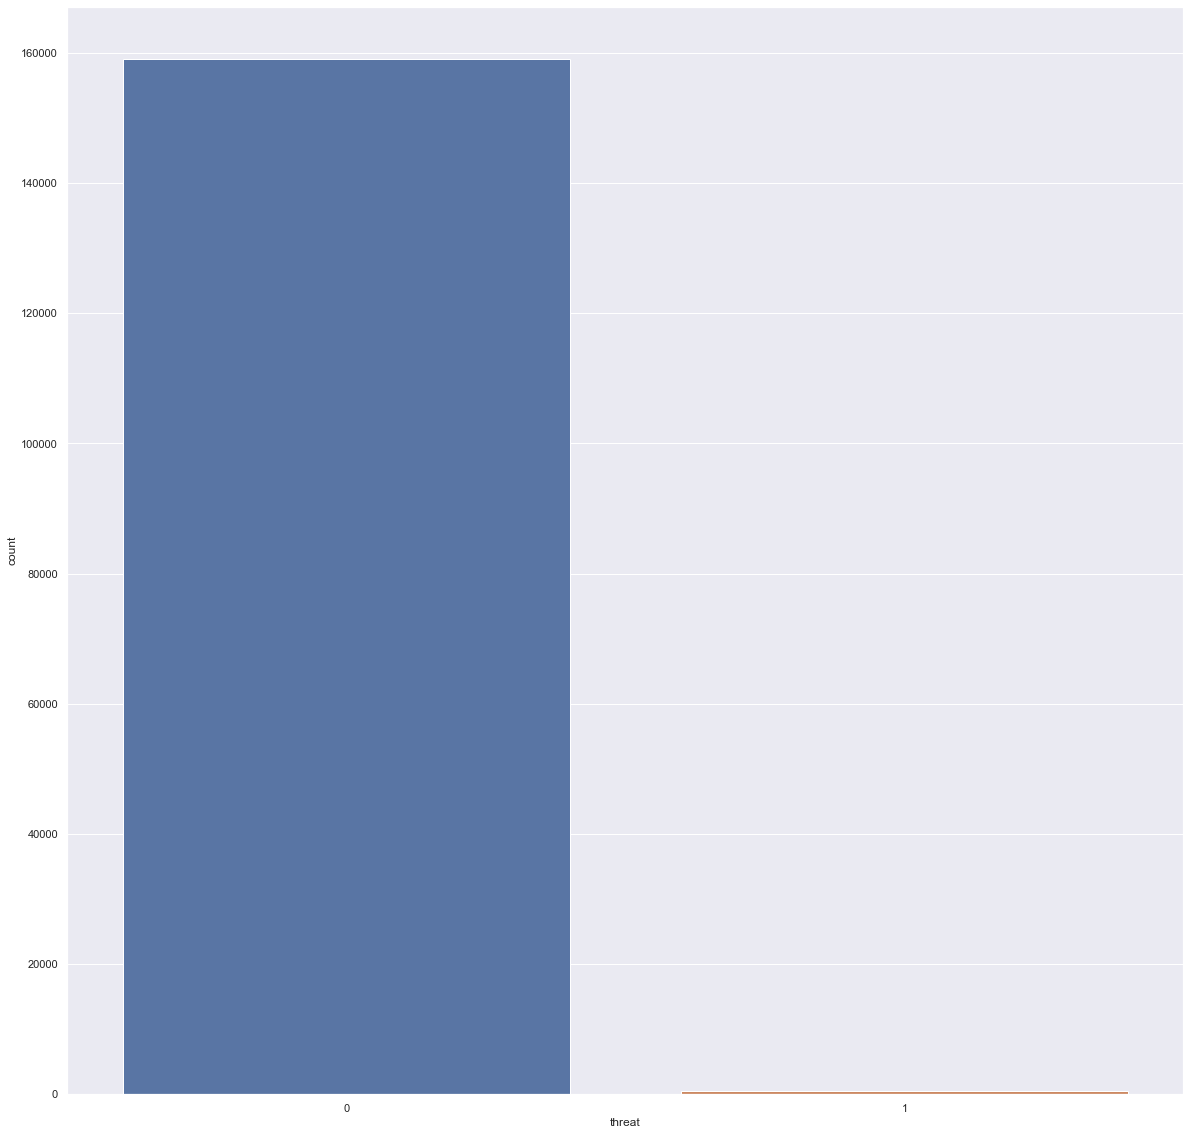

In [14]:
plt.figure(figsize=(20,20))
sns.countplot('threat',data=train) 

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


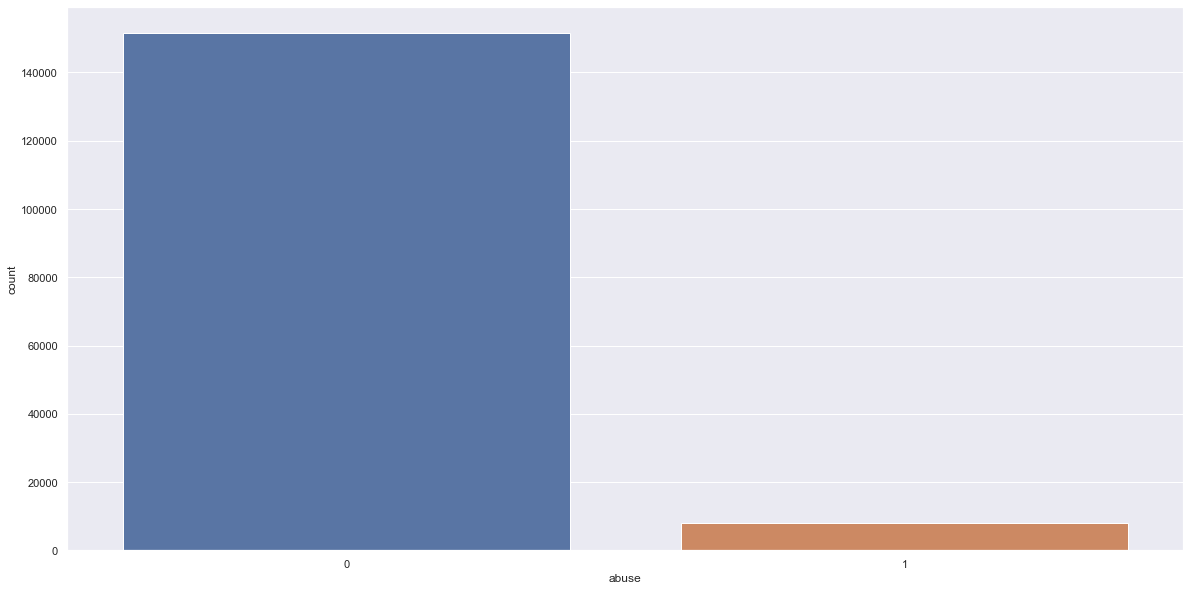

In [15]:
plt.figure(figsize=(20,10))
sns.countplot('abuse',data=train) 

C:\Users\Techitfirst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


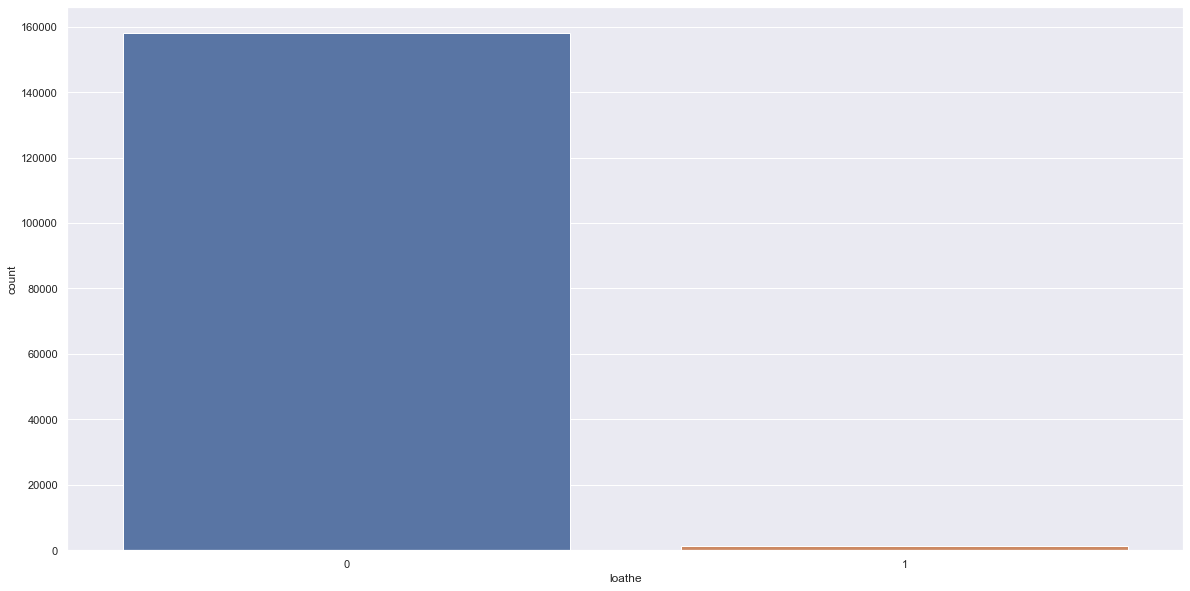

In [16]:
plt.figure(figsize=(20,10))
sns.countplot('loathe',data=train) 

In [17]:
train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

We understand that 15294 comments amongst 144277 are Malignant or offensive.

In [18]:
train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

We understand that 1595 comments amongst  are highly Malignant or offensive

In [19]:
train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

We understand that 478 comments amongst are threatning.

In [20]:
train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

We understand that 8449 comments amongst 151122 are rude.

In [21]:
train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

We understand that 7877 comments amongst 151694 are abusive

In [22]:
train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

We understand that 1406 comments amongst 158166 are loathe.

In [23]:
# Replacing formats that include paranthesis, spaces, no spaces, dashes)
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  '')

In [24]:
train

,Unnamed: 0,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [25]:
def remove_punctuation(x):                                      # removing punctuations
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
train.apply(remove_punctuation)

,Unnamed: 0,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,And for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,Spitzer \n\nUmm theres no actual article for p...,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [26]:
def remove_punctuation(x):                                      # removing punctuations
    try:
        x=x.str.replace('[^\w\s]','')
    except:
            pass
    return x
test.apply(remove_punctuation)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
...,...,...
153159,fffcd0960ee309b5,\n i totally agree this stuff is nothing but ...
153160,fffd7a9a6eb32c16,Throw from out field to home plate \n\n Does...
153161,fffda9e8d6fafa9e,\n\n Okinotorishima categories \n\n I see y...
153162,fffe8f1340a79fc2,\n\n One of the founding nations of the EU ...


In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

test['comment_text']=LE.fit_transform(test['comment_text'])
test                                                                             # Converting object data to integer.

test['id']=LE.fit_transform(test['id'])
test  

,id,comment_text
0,0,139364
1,1,82839
2,2,15380
3,3,71648
4,4,116410
...,...,...
153159,153159,51750
153160,153160,93241
153161,153161,13499
153162,153162,8042


In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

train['comment_text']=LE.fit_transform(train['comment_text'])
train                                                                             # Converting object data to integer.



,Unnamed: 0,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,72698,0,0,0,0,0,0
1,000103f0d9cfb60f,68359,0,0,0,0,0,0
2,000113f07ec002fd,79594,0,0,0,0,0,0
3,0001b41b1c6bb37e,35519,0,0,0,0,0,0
4,0001d958c54c6e35,146426,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,44289,0,0,0,0,0,0
159567,ffea4adeee384e90,145720,0,0,0,0,0,0
159568,ffee36eab5c267c9,122203,0,0,0,0,0,0
159569,fff125370e4aaaf3,60037,0,0,0,0,0,0


In [29]:
train.drop("Unnamed: 0",axis='columns', inplace=True)
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,72698,0,0,0,0,0,0
1,68359,0,0,0,0,0,0
2,79594,0,0,0,0,0,0
3,35519,0,0,0,0,0,0
4,146426,0,0,0,0,0,0


In [30]:
test.head()

,id,comment_text
0,0,139364
1,1,82839
2,2,15380
3,3,71648
4,4,116410


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = train['comment_text']
x = train.drop('comment_text', axis = 1)

In [33]:
x.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [34]:
y.head()

0     72698
1     68359
2     79594
3     35519
4    146426
Name: comment_text, dtype: int32

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Here we are classifying the comments into various categories
hence we will be using the classification algorithms to train models.

In [37]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()        
lg

LogisticRegression()

In [38]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

MemoryError: Unable to allocate 121. GiB for an array with shape (127656, 127656) and data type int64

In [39]:
x_test

array([[-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724],
       [-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724],
       [-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724],
       ...,
       [-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724],
       [-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724],
       [-0.32529608, -0.10392317, -0.23800867, -0.0563445 , -0.22829747,
        -0.09305724]])

In [40]:
y_pred = lg.predict(x_test)

AttributeError: 'list' object has no attribute 'shape'

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)                                       #Decision tree classifier
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

MemoryError: Unable to allocate 30.4 GiB for an array with shape (31915, 1, 127656) and data type float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)                       # Random forest classifier
print (accuracy_score(y_test,predrf))
print (confusion_matrix(y_test,predrf))
print (classification_report(y_test,predrf))

In [42]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)

MemoryError: Unable to allocate 121. GiB for an array with shape (127656, 127656) and data type int64

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))                  # Logistic regression
print(classification_report(y_test,pred))

NameError: name 'pred' is not defined

In [44]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lg, x,y, cv=5)
print("Cross Validation score of LogisticRegression model :",scr.mean())

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [45]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt, x,y, cv=5)
print("Cross Validation score of DecisionTree model :",scr.mean())

ValueError: n_splits=5 cannot be greater than the number of members in each class.

In [46]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x,y, cv=5)
print("Cross Validation score of RandomForest model :",scr.mean())

NameError: name 'rf' is not defined

In [47]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth': np.arange(2,15),
           'criterion':['gini','entropy']}
